In [1]:
import json
import numpy as np
import seaborn as sns
import pandas as pd
from scikit_posthocs import posthoc_wilcoxon

In [2]:
f = open("results_100_with_BoW_cwe_capec_class_weight_5.json")
class_weight_5_results = json.load(f)

f = open("results_100_with_BoW_cwe_capec.json")
results = json.load(f)

f = open("results_100_with_BoW_cwe_capec_with_cve_2021.json")
results_with_cve = json.load(f)

In [3]:
BoW_fp = results["1"]["A0"]["fp"]
BoW_class_weight_5_fp = class_weight_5_results["1"]["A0"]["fp"]

BoW_acc = results["1"]["A0"]["acc"]
BoW_class_weight_5_acc = class_weight_5_results["1"]["A0"]["acc"]

print(np.mean(BoW_fp))
print(np.mean(BoW_class_weight_5_fp))

print(np.mean(BoW_acc))
print(np.mean(BoW_class_weight_5_acc))

0.22922887261973057
0.22437061577268605
0.8020524017467249
0.7934206695778748


In [4]:
results = {"1": results["1"], "2": results["2"], "3": results["3"]}

In [5]:
highest_val = 0
highest_encoding = None
metric = "acc"
for encoding in results:
    for data_combo in results[encoding]:
        mean_metric = np.mean(results[encoding][data_combo][metric])
        if mean_metric > highest_val:
            highest_val = mean_metric
            highest_encoding = (encoding, data_combo)

print(highest_encoding)
print(highest_val)

('1', 'A0')
0.8020524017467249


Encoding method:  2 , Data combo:  A1
0.798617176128093
Encoding method:  2 , Data combo:  A0
0.8010189228529839
Encoding method:  2 , Data combo:  A1 + MI
0.782911208151383
Encoding method:  2 , Data combo:  A1 + D
0.776768558951965
Encoding method:  2 , Data combo:  A1 + MI + D
0.7763609898107715


[Text(0, 0.5, 'Data combo'), Text(0.5, 0, 'Accuracy')]

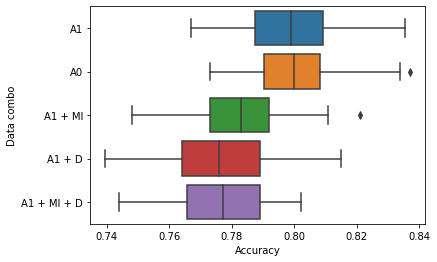

In [6]:
encoding = "2"

data = {}
for data_combo in results[encoding]:
    print("Encoding method: ", encoding, ", Data combo: ", data_combo)
    data[data_combo] = results[encoding][data_combo]["acc"]
    print(np.mean(results[encoding][data_combo]["acc"]))

data = pd.DataFrame(data)

sns.boxplot(data=data, orient="h").set(ylabel="Data combo", xlabel="Accuracy")

Encoding method:  1 , Data combo:  A0
0.8020378457059679
Encoding method:  2 , Data combo:  A0
0.7998544395924309
Encoding method:  3 , Data combo:  A0
0.7998544395924309


[Text(0, 0.5, 'Encoding'), Text(0.5, 0, 'Accuracy')]

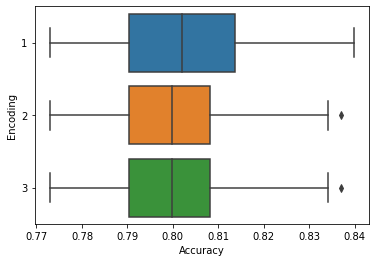

In [7]:
import seaborn as sns
import pandas as pd

data_combo = "A0"
data = {}
for encoding in results:
    print("Encoding method: ", encoding, ", Data combo: ", data_combo)
    data[encoding] = results[encoding][data_combo]["acc"]
    print(np.median(results[encoding][data_combo]["acc"]))

data = pd.DataFrame(data)

sns.boxplot(data=data, orient="h").set(ylabel="Encoding", xlabel="Accuracy")

In [8]:
data_combo = "A1 + MI + D"
accs = []
encodings = []
for encoding in results:
    if data_combo != "A0" or encoding not in ["2", "5"]:
        print(data_combo)
        print(encoding)
        encodings.append(encoding)
        accs.append(results[encoding][data_combo]["acc"])

rank_sums = posthoc_wilcoxon(accs, p_adjust="bonferroni")
rank_sums.columns = encodings
rank_sums.index = encodings
rank_sums

A1 + MI + D
1
A1 + MI + D
2
A1 + MI + D
3


,1,2,3
1,1.000000e+00,4.734087e-13,6.394813e-17
2,4.734087e-13,1.000000e+00,1.692324e-17
3,6.394813e-17,1.692324e-17,1.000000e+00


In [9]:
encoding = "3"
accs = []
data_combo_list = []
for data_combo in results[encoding]:
    print(data_combo)
    print(encoding)
    data_combo_list.append(data_combo)
    accs.append(results[encoding][data_combo]["acc"])
rank_sums = posthoc_wilcoxon(accs, p_adjust="bonferroni")
rank_sums.columns = data_combo_list
rank_sums.index = data_combo_list
rank_sums

A0
3
A1
3
A1 + MI
3
A1 + D
3
A1 + MI + D
3


,A0,A1,A1 + MI,A1 + D,A1 + MI + D
A0,1.000000e+00,4.319367e-01,3.876605e-17,3.863284e-17,3.856313e-17
A1,4.319367e-01,1.000000e+00,3.868956e-17,3.858925e-17,3.874856e-17
A1 + MI,3.876605e-17,3.868956e-17,1.000000e+00,2.203408e-16,1.000000e+00
A1 + D,3.863284e-17,3.858925e-17,2.203408e-16,1.000000e+00,6.067520e-16
A1 + MI + D,3.856313e-17,3.874856e-17,1.000000e+00,6.067520e-16,1.000000e+00


Encoding method:  1 , Data combo:  A0
Encoding method:  1 , Data combo:  A1
Encoding method:  1 , Data combo:  A1 + MI
Encoding method:  1 , Data combo:  A1 + D
Encoding method:  1 , Data combo:  A1 + MI + D
Encoding method:  2 , Data combo:  A1
Encoding method:  2 , Data combo:  A0
Encoding method:  2 , Data combo:  A1 + MI
Encoding method:  2 , Data combo:  A1 + D
Encoding method:  2 , Data combo:  A1 + MI + D
Encoding method:  3 , Data combo:  A0
Encoding method:  3 , Data combo:  A1
Encoding method:  3 , Data combo:  A1 + MI
Encoding method:  3 , Data combo:  A1 + D
Encoding method:  3 , Data combo:  A1 + MI + D


[Text(0, 0.5, '(Encoding, data combination)'),
 Text(0.5, 0, 'Accuracy'),
 Text(0.5, 1.0, 'BoW Experiments')]

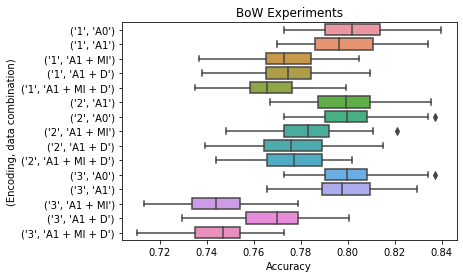

In [10]:
data = {}
for encoding in results:
    for data_combo in results[encoding]:
        print("Encoding method: ", encoding, ", Data combo: ", data_combo)
        data[(encoding, data_combo)] = results[encoding][data_combo]["acc"]

data = pd.DataFrame(data)

sns.boxplot(data=data, orient="h").set(
    ylabel="(Encoding, data combination)", xlabel="Accuracy", title="BoW Experiments"
)